In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import osmnx as ox
import networkx as nx
import math
from numpy import linalg as LA
import numpy as np
import math

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
data = gpd.read_file("../data/neighbourhood_division/export.geojson")

<Axes: >

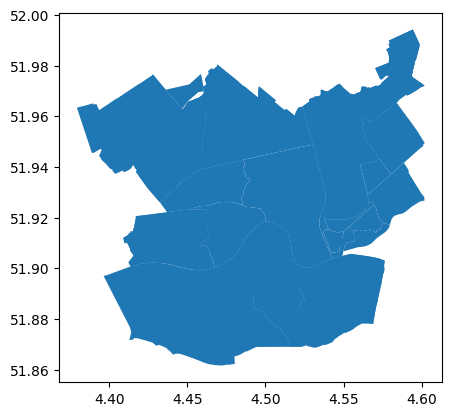

In [3]:
data.plot()

In [4]:
data

,id,@id,boundary,name,place,type,postal_code,wikidata,wikipedia,designation,note,population,alt_name,official_name,@relations,geometry
0,relation/2580497,relation/2580497,place,Motorstraatgebied,locality,boundary,None,None,None,None,None,None,None,None,None,"POLYGON ((4.49587 51.88839, 4.49543 51.88806, ..."
1,relation/2698613,relation/2698613,place,Zuidwijk,quarter,boundary,3085,Q12013558,nl:Zuidwijk (Rotterdam),None,None,None,None,None,None,"POLYGON ((4.47897 51.87746, 4.47872 51.87685, ..."
2,relation/10338830,relation/10338830,place,IJsselmonde,suburb,boundary,3076,Q2240740,nl:IJsselmonde (stadsdeel),bestuurscommissiegebied,None,None,None,None,None,"POLYGON ((4.54938 51.87403, 4.54925 51.87420, ..."
3,relation/10338831,relation/10338831,place,Groot-IJsselmonde,quarter,boundary,None,Q2206856,nl:Groot-IJsselmonde,None,None,None,None,None,None,"POLYGON ((4.55587 51.87596, 4.55602 51.87602, ..."
4,relation/10338897,relation/10338897,place,Beverwaard,quarter,boundary,3077,Q2609444,nl:Beverwaard,None,None,None,None,None,None,"POLYGON ((4.55738 51.89607, 4.55810 51.89585, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,node/6139790070,node/6139790070,None,None,None,None,None,None,None,None,None,None,None,None,"[ { ""role"": ""label"", ""rel"": 13722054, ""reltags...",POINT (4.58497 51.92844)
123,node/9448666896,node/9448666896,None,None,None,None,None,None,None,None,None,None,None,None,"[ { ""role"": ""label"", ""rel"": 13722056, ""reltags...",POINT (4.56827 51.93555)
124,node/6139774835,node/6139774835,None,None,None,None,None,None,None,None,None,None,None,None,"[ { ""role"": ""label"", ""rel"": 13716296, ""reltags...",POINT (4.56300 51.94627)
125,node/6139774836,node/6139774836,None,None,None,None,None,None,None,None,None,None,None,None,"[ { ""role"": ""label"", ""rel"": 13722057, ""reltags...",POINT (4.58491 51.95153)


In [5]:
data[data["boundary"] == "place"]

,id,@id,boundary,name,place,type,postal_code,wikidata,wikipedia,designation,note,population,alt_name,official_name,@relations,geometry
0,relation/2580497,relation/2580497,place,Motorstraatgebied,locality,boundary,None,None,None,None,None,None,None,None,None,"POLYGON ((4.49587 51.88839, 4.49543 51.88806, ..."
1,relation/2698613,relation/2698613,place,Zuidwijk,quarter,boundary,3085,Q12013558,nl:Zuidwijk (Rotterdam),None,None,None,None,None,None,"POLYGON ((4.47897 51.87746, 4.47872 51.87685, ..."
2,relation/10338830,relation/10338830,place,IJsselmonde,suburb,boundary,3076,Q2240740,nl:IJsselmonde (stadsdeel),bestuurscommissiegebied,None,None,None,None,None,"POLYGON ((4.54938 51.87403, 4.54925 51.87420, ..."
3,relation/10338831,relation/10338831,place,Groot-IJsselmonde,quarter,boundary,None,Q2206856,nl:Groot-IJsselmonde,None,None,None,None,None,None,"POLYGON ((4.55587 51.87596, 4.55602 51.87602, ..."
4,relation/10338897,relation/10338897,place,Beverwaard,quarter,boundary,3077,Q2609444,nl:Beverwaard,None,None,None,None,None,None,"POLYGON ((4.55738 51.89607, 4.55810 51.89585, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,relation/13722054,relation/13722054,place,Middelwatering,quarter,boundary,None,Q2674028,nl:Middelwatering,None,None,None,None,None,None,"POLYGON ((4.58032 51.93712, 4.57554 51.93452, ..."
58,relation/13722056,relation/13722056,place,Schenkel,quarter,boundary,None,Q2662062,nl:Schenkel (Capelle aan den IJssel),None,None,None,None,None,None,"POLYGON ((4.56470 51.92955, 4.56498 51.92932, ..."
59,relation/13722057,relation/13722057,place,Schollevaar,quarter,boundary,None,Q4361509,nl:Schollevaar (Capelle aan den IJssel),None,None,None,None,None,None,"POLYGON ((4.58865 51.94168, 4.59948 51.94762, ..."
60,relation/13722063,relation/13722063,place,Rivium,quarter,boundary,None,Q23925463,nl:Rivium,None,None,None,None,None,None,"POLYGON ((4.55026 51.91482, 4.54848 51.91442, ..."


In [4]:
relations = data[data["boundary"] == "place"]

In [5]:
relations['place'].unique()

array(['locality', 'quarter', 'suburb'], dtype=object)

<AxesSubplot:>

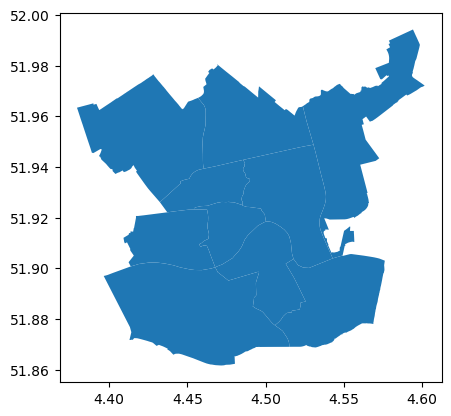

In [9]:
relations[relations['place'] == 'suburb'].plot()

In [13]:
relations[relations['place'] == 'suburb'].to_file("../data/neighbourhood_division/neighbourhood_map_suburb.geojson", driver='GeoJSON')  

In [12]:
relations[relations['place'] == 'suburb']

,id,@id,boundary,name,place,type,postal_code,wikidata,wikipedia,designation,note,population,alt_name,official_name,@relations,geometry
2,relation/10338830,relation/10338830,place,IJsselmonde,suburb,boundary,3076,Q2240740,nl:IJsselmonde (stadsdeel),bestuurscommissiegebied,None,None,None,None,None,"POLYGON ((4.54938 51.87403, 4.54925 51.87420, ..."
15,relation/10459111,relation/10459111,place,Delfshaven,suburb,boundary,None,Q1184149,nl:Delfshaven (stadsdeel),bestuurscommissiegebied,bestuurscommissiegebied Delfshaven (voormalige...,None,None,None,None,"POLYGON ((4.46368 51.91174, 4.46349 51.91210, ..."
17,relation/10459151,relation/10459151,place,Centrum,suburb,boundary,None,Q2729544,nl:Rotterdam Centrum,bestuurscommissiegebied,None,None,None,None,None,"POLYGON ((4.46214 51.92467, 4.45870 51.92455, ..."
18,relation/10459162,relation/10459162,place,Noord,suburb,boundary,None,Q2907748,nl:Rotterdam-Noord,bestuurscommissiegebied,None,None,None,None,None,"POLYGON ((4.47682 51.92616, 4.47982 51.92605, ..."
19,relation/10459172,relation/10459172,place,Kralingen-Crooswijk,suburb,boundary,None,Q2503376,nl:Kralingen-Crooswijk,bestuurscommissiegebied,None,None,None,None,None,"POLYGON ((4.51791 51.90370, 4.52088 51.90124, ..."
28,relation/13714903,relation/13714903,place,Feijenoord,suburb,boundary,None,Q827086,nl:Feijenoord (stadsdeel),bestuurscommissiegebied,"bestuurscommissiegebied Feijenoord, dus niet d...",74040,None,None,None,"POLYGON ((4.51269 51.91481, 4.51200 51.91528, ..."
32,relation/13715829,relation/13715829,place,Charlois,suburb,boundary,None,Q2289835,nl:Charlois,bestuurscommissiegebied,None,None,None,None,None,"POLYGON ((4.51084 51.87533, 4.51007 51.87571, ..."
33,relation/13715830,relation/13715830,place,Prins Alexander,suburb,boundary,None,Q2132831,nl:Prins Alexander (stadsdeel),bestuurscommissiegebied,None,None,None,None,None,"POLYGON ((4.54769 51.97281, 4.54750 51.97280, ..."
34,relation/13715850,relation/13715850,place,Overschie,suburb,boundary,None,Q2389241,nl:Overschie (stadsdeel),bestuurscommissiegebied,"bestuurscommissiegebied Overschie, dus niet de...",None,None,None,None,"POLYGON ((4.41705 51.93826, 4.41770 51.93757, ..."
35,relation/13715853,relation/13715853,place,Hillegersberg-Schiebroek,suburb,boundary,None,Q3136294,nl:Hillegersberg-Schiebroek,bestuurscommissiegebied,None,None,None,None,None,"POLYGON ((4.46901 51.98055, 4.46896 51.98052, ..."


In [8]:
relations[relations["place"] == "suburb"]['name'].unique()

array(['IJsselmonde', 'Delfshaven', 'Centrum', 'Noord',
       'Kralingen-Crooswijk', 'Feijenoord', 'Charlois', 'Prins Alexander',
       'Overschie', 'Hillegersberg-Schiebroek'], dtype=object)

<AxesSubplot:>

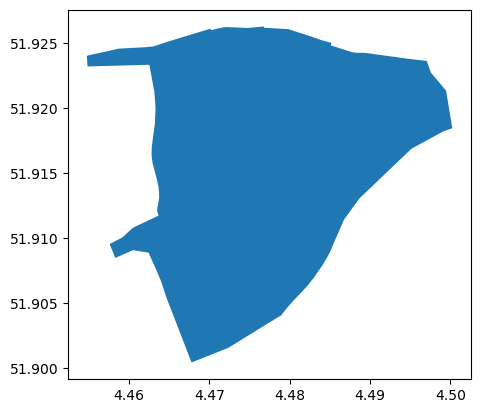

In [9]:
relations[(relations["place"] == "suburb") & (relations['name'] == "Centrum")].plot()

centrum, noord, Kralingen-Crooswijk

<AxesSubplot:>

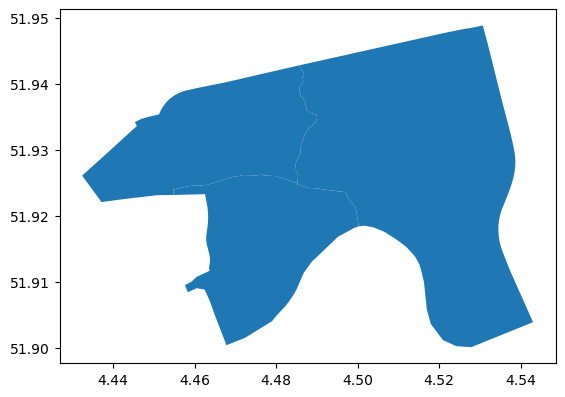

In [11]:
relations[(relations["place"] == "suburb") & (relations['name'].isin(["Centrum", "Noord", "Kralingen-Crooswijk"]))].plot()

<AxesSubplot:>

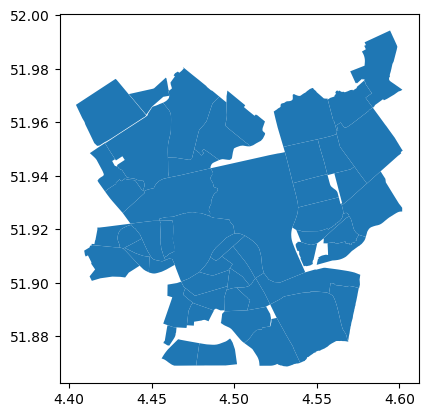

In [12]:
relations[(relations["place"] != "suburb") | ((relations["place"] == "suburb") & (relations['name'].isin(["Centrum", "Noord", "Kralingen-Crooswijk"])))].plot()

In [13]:
final_map = relations[(relations["place"] != "suburb") | ((relations["place"] == "suburb") & (relations['name'].isin(["Centrum", "Noord", "Kralingen-Crooswijk"])))]

<AxesSubplot:>

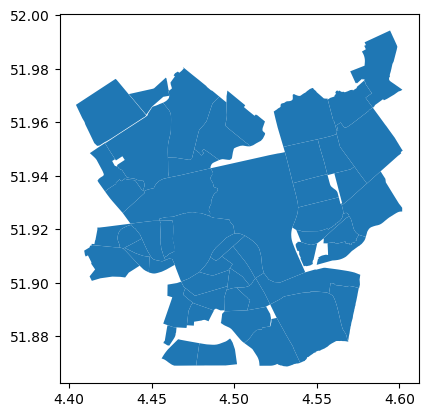

In [14]:
final_map.plot()

In [15]:
final_map.to_file("../data/neighbourhood_division/neighbourhood_map.geojson", driver='GeoJSON')  

In [8]:
import numpy as np
from shapely.geometry import Point

def Random_Points_in_Polygon(polygon, number):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points

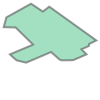

In [77]:
final_map.iloc[0]["geometry"]

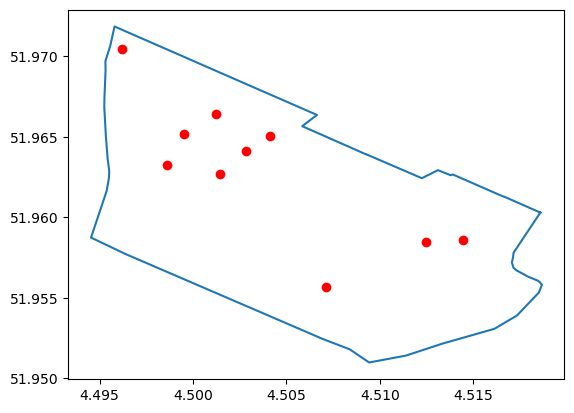

In [112]:
polygon=final_map.iloc[40]["geometry"]
points = Random_Points_in_Polygon(polygon, 10)

# Plot the polygon
xp,yp = polygon.exterior.xy
plt.plot(xp,yp)

# Plot the list of points
xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys,color="red")
plt.show()

"Centrum" heeft 6
"Noord" heeft 8
"Kralingen-Crooswijk" heeft 5

In [118]:
points = []
num_of_points_per_neighbourhood = 1
for index, row in final_map.iterrows():
    points = points + Random_Points_in_Polygon(row["geometry"], num_of_points_per_neighbourhood)
    

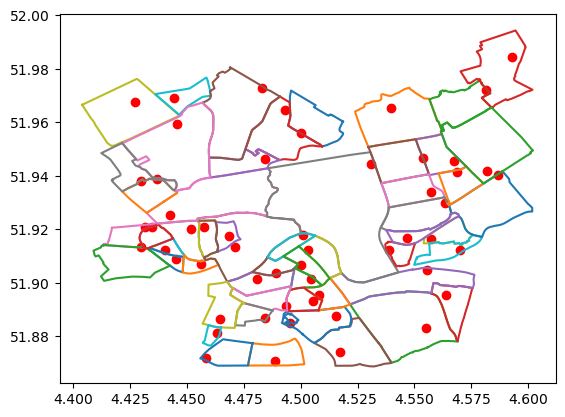

In [119]:
for index, row in final_map.iterrows():
    xp,yp = row["geometry"].exterior.xy
    plt.plot(xp,yp)

xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys,color="red")
plt.show()

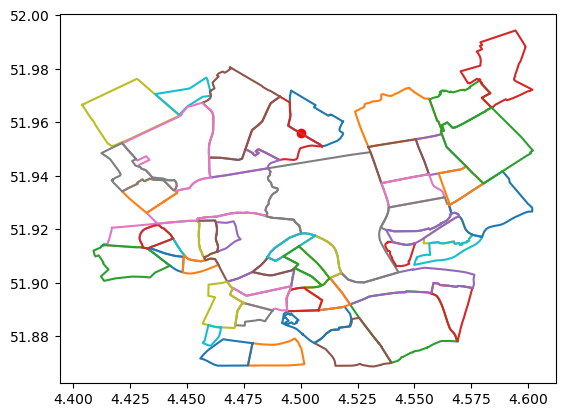

In [132]:
for index, row in final_map.iterrows():
    xp,yp = row["geometry"].exterior.xy
    plt.plot(xp,yp)

neigh_hood = 40
plt.scatter(points[neigh_hood].x, points[neigh_hood].y,color="red")
plt.show()

In [143]:
point = points[40]
closest_node = None
closest_distance = math.inf 

for index1, node in graph.nodes(data=True):
    distance = math.dist([point.x, point.y], [node.get("x"), node.get("y")])
#     distance = math.acos(math.sin(point.y*math.sin(node.get("y"))+math.cos(point.y)*math.cos(node.get("y"))*math.cos(node.get("x")-point.x)))*6371
    if distance < closest_distance:
        closest_distance = distance
        closest_node = index1

In [142]:
math.dist([4.5003457032815275, 51.95593226285517], [4.4753939, 51.9064968])

0.05537560360578574

In [144]:
closest_distance

0.0006647076233016887

In [145]:
point.x

4.5003457032815275

In [146]:
point.y

51.95593226285517

In [147]:
graph.nodes[closest_node]

{'y': 51.9565, 'x': 4.5, 'street_count': 3}

In [96]:
#read in graph 
filepath="../graph/rotterdam_drive_bbox_cameras_traffic_lights_bridges_roundabouts_tunnels.graphml"
graph=ox.load_graphml(filepath)

In [94]:
print(points[0].y) #-> lat
print(points[0].x) #-> lon

51.886786683380535
4.4970494608365525


In [148]:
points_in_graph = []
for point in points:
    closest_node = None
    closest_distance = math.inf 
    
    for index1, node in graph.nodes(data=True):
        distance = math.dist([point.x, point.y], [node.get("x"), node.get("y")])
        if distance < closest_distance:
            closest_distance = distance
            closest_node = index1
            
    points_in_graph.append(closest_node)

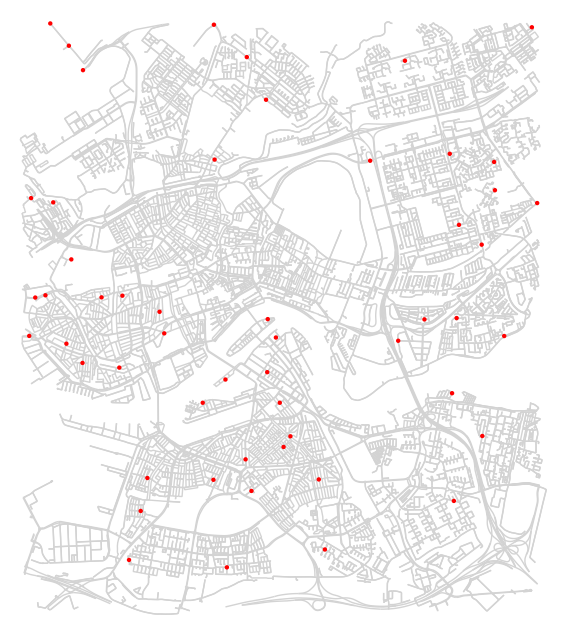

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [149]:
node_size = []
node_color = []
count = 0
for node in graph.nodes:
    if node in points_in_graph:
        node_size.append(10)
        node_color.append('red')
        count +=1
    else:
        node_size.append(0)
        node_color.append('blue')


ox.plot.plot_graph(
            graph, bgcolor="white", node_color=node_color, node_size=node_size, edge_linewidth=1,
            edge_color='lightgray'
        )

In [123]:
count

54

# Add edge effects

In [4]:
neighbourhoods = gpd.read_file("../data/neighbourhood_division/neighbourhood_map_suburb.geojson")

In [5]:
filepath="../graph/rotterdam_drive_bbox_cameras_traffic_lights_bridges_roundabouts_tunnels.graphml"
graph=ox.load_graphml(filepath)

In [6]:
#outer bounds 
percentage_out_of_bound = 0.05
lat_min= 51.863171
lat_max = 51.970486
lon_min= 4.427773 
lon_max = 4.580918

ten_perc_lat = (lat_max - lat_min) * percentage_out_of_bound
ten_perc_lon = (lon_max - lon_min) * percentage_out_of_bound

In [9]:
print(Random_Points_in_Polygon(neighbourhoods[neighbourhoods["name"]=="Kralingen-Crooswijk"].iloc[0]['geometry'], num_of_points_per_neighbourhood))

NameError: name 'num_of_points_per_neighbourhood' is not defined

In [10]:
points = []
num_of_points_per_neighbourhood = 1
for index, row in neighbourhoods.iterrows():
    fit = True
    while fit:
        point = Random_Points_in_Polygon(row["geometry"], num_of_points_per_neighbourhood)[0]
        print(point)
        print(index)
        if (lat_max - ten_perc_lat > point.y > lat_min + ten_perc_lat) & (lon_max - ten_perc_lon > point.x > lon_min + ten_perc_lon):
            points.append(point)
            fit = False
        print(fit)
    

POINT (4.564959250668952 51.89720107805186)
0
False
POINT (4.434984876712573 51.91944172431292)
1
True
POINT (4.437542836364746 51.91132565604437)
1
False
POINT (4.472392042679473 51.91570783790765)
2
False
POINT (4.472818907158152 51.93909755060616)
3
False
POINT (4.498390992879497 51.94106315867276)
4
False
POINT (4.50255658510099 51.88618593448248)
5
False
POINT (4.439736215248979 51.8923916829357)
6
False
POINT (4.557238919215891 51.94230937041487)
7
False
POINT (4.416052459231198 51.96638992792235)
8
True
POINT (4.418369044253938 51.95883811976309)
8
True
POINT (4.391030359379126 51.94716588281103)
8
True
POINT (4.434777434753343 51.9710994084299)
8
True
POINT (4.398377068413196 51.94310775443871)
8
True
POINT (4.39718166891346 51.95333140169794)
8
True
POINT (4.411232703879879 51.94771400717048)
8
True
POINT (4.450818404661783 51.9553613025555)
8
False
POINT (4.484343408322303 51.95599845428791)
9
False


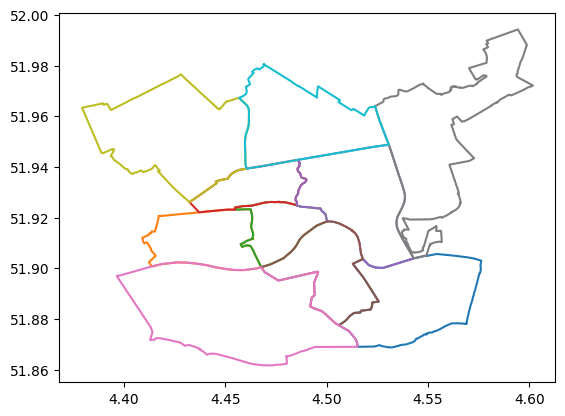

In [20]:
for index, row in neighbourhoods.iterrows():
    xp,yp = row["geometry"].exterior.xy
    plt.plot(xp,yp)

# xs = [point.x for point in points]
# ys = [point.y for point in points]
# plt.scatter(xs, ys,color="red")
plt.savefig("neighbourhoods.png")

In [12]:
points_in_graph = []
for point in points:
    closest_node = None
    closest_distance = math.inf 
    
    for index1, node in graph.nodes(data=True):
        distance = math.dist([point.x, point.y], [node.get("x"), node.get("y")])
        if distance < closest_distance:
            closest_distance = distance
            closest_node = index1
            
    points_in_graph.append(closest_node)

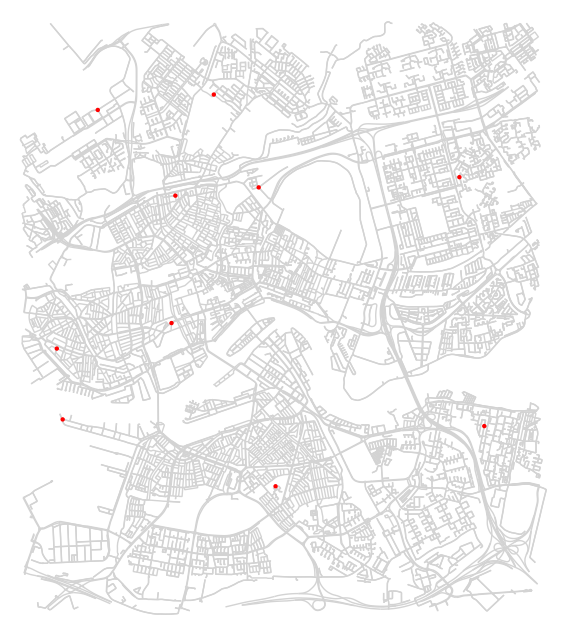

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [14]:
node_size = []
node_color = []
count = 0
for node in graph.nodes:
    if node in points_in_graph:
        node_size.append(10)
        node_color.append('red')
        count +=1
    else:
        node_size.append(0)
        node_color.append('blue')


ox.plot.plot_graph(
            graph, bgcolor="white", node_color=node_color, node_size=node_size, edge_linewidth=1,
            edge_color='lightgray', save=True, filepath="random_points.png"
        )